# recommendation 

In [0]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA as pca
from sklearn.preprocessing import StandardScaler

In [0]:
pca = pca(n_components=1)

### Simulation of data for Recommender system

In [0]:
ts = [random.choice([round(np.random.normal(loc=60,scale=10)) for i in range(40)]+[round(np.random.normal(loc=120,scale=30)) for i in range(10)]+[random.randint(0,20) for i in range(50)]) for i in range(1000)]
freq = [round(random.choice([np.random.normal(loc=5,scale=2) for i in range(10)]+[random.randint(0,1) for i in range(20)])) for i in range(1000)]
df = pd.DataFrame(zip(ts,freq),columns=['ts','freq'])
for i in range(1000):
  if(df['ts'][i]<5):
    df['freq'][i] = 0
  if df['ts'][i] > 80:
    df['freq'][i] = random.choice([1,2,3])
  elif df['ts'][i]>30 and df['ts'][i]<80 :
    df['freq'][i] = random.choice([2,3,4])

In [4]:
df.head()

,ts,freq
0,110,2
1,13,0
2,59,3
3,7,1
4,3,0


ts:time_spent in a store
freq: freq of visiting a store

In [0]:
x = df.values
x = StandardScaler().fit_transform(x)
principalComponents = pca.fit_transform(x)
principalComponents = [i[0] for i in principalComponents]
fdfc = pd.DataFrame(df['freq'].values,columns=['freq'])
pdfc = pd.DataFrame(zip(principalComponents,ts,freq),columns=['pcaval','ts','freq'])

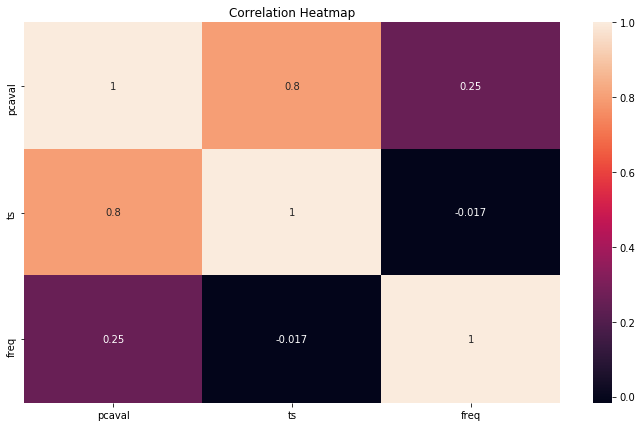

In [6]:
fig1,ax1 = plt.subplots(figsize=(12,7))
sns.heatmap(pdfc.corr(method='spearman'),annot=True)
ax1.set_title('Correlation Heatmap')
plt.show()

### In the data,we have two features time spent and frequency for every user for every store. This creates 3 dimensions. S0, PCA is applied on those two features and a pca value is found.The above correlation heatmap suggests that there is a strong corr btwn pcaval and ts.  

In [0]:
pdf = pd.DataFrame()
fdf = pd.DataFrame()
for j in range(256):
  ts = [random.choice([round(np.random.normal(loc=60,scale=10)) for i in range(40)]+[round(np.random.normal(loc=120,scale=30)) for i in range(10)]+[random.randint(0,20) for i in range(50)]) for i in range(1000)]
  freq = [round(random.choice([np.random.normal(loc=5,scale=2) for i in range(10)]+[random.randint(0,1) for i in range(20)])) for i in range(1000)]
  df = pd.DataFrame(zip(ts,freq),columns=['ts','freq'])
  for i in range(1000):
    if df['freq'][i] < 0:
      df['freq'][i] == 1
    if(df['ts'][i]<5):
      df['freq'][i] = 0
    if df['ts'][i] > 80:
      df['freq'][i] = random.choice([1,2,3])
    elif df['ts'][i]>30 and df['ts'][i]<80 :
      df['freq'][i] = random.choice([2,3,4])

  x = df.values
  x = StandardScaler().fit_transform(x)
  principalComponents = pca.fit_transform(x)
  fdf.insert(j, str(j), df['freq'].values, True)
  pdf.insert(j, str(j), [l[0] for l in principalComponents], True)

In [0]:
# top 5
top5 = []
c = list(range(1000))
for i in range(1000):
  l = sorted(zip(fdf.iloc[[i]].values[0].tolist(),c),reverse=True)[:5]
  top5.append([i,l])
  

### The above or below code,both of these,can find top 5 stores that a user would want to visit.

In [0]:
#top5
d = pd.DataFrame([[id for f,id in sorted([list(a) for a in zip(fdf.iloc[[i]].values[0].tolist(),c)],reverse=True)] for i in range(1000)])

In [26]:
d.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
0,230,25,65,253,250,241,215,203,251,243,182,177,165,159,155,119,50,252,147,141,126,89,9,246,240,239,234,226,217,208,207,201,186,184,179,175,173,163,157,151,...,148,144,142,139,138,131,130,127,124,121,118,115,110,103,99,95,94,91,84,79,76,73,67,62,58,56,54,53,49,46,45,44,38,29,26,20,19,8,5,2
1,133,165,98,30,11,252,251,17,247,239,197,177,141,127,88,24,250,240,237,234,231,219,216,215,211,210,191,189,188,183,180,175,174,163,143,138,131,124,122,121,...,113,112,111,109,107,97,95,94,92,85,83,80,78,76,68,65,62,56,55,53,52,51,48,46,44,43,41,34,31,23,22,21,20,13,12,8,7,6,1,0
2,239,127,40,12,207,68,200,158,92,80,66,35,241,190,173,168,128,106,105,82,70,69,24,23,247,220,219,217,213,212,208,183,179,170,167,166,163,153,125,109,...,223,222,218,205,203,197,192,184,182,175,169,165,161,159,151,145,144,140,118,114,107,95,90,88,86,81,79,78,72,65,64,59,54,53,52,46,36,34,15,11
3,209,138,233,224,222,248,182,118,76,54,53,38,20,139,95,90,39,37,36,254,246,228,217,215,214,198,192,178,176,175,148,147,145,103,91,73,71,68,61,57,...,151,149,141,140,136,130,128,123,121,120,119,117,116,113,107,102,101,99,93,81,78,72,67,63,62,58,55,48,35,34,29,28,27,21,17,13,10,3,2,1
4,158,155,237,196,17,186,79,21,223,185,176,162,112,103,22,255,254,252,247,232,227,211,210,182,174,173,159,154,151,149,136,115,111,98,96,83,80,78,74,73,...,179,171,169,164,148,144,143,142,140,137,133,130,126,123,121,117,109,101,100,97,94,90,89,59,53,51,46,43,42,40,39,33,28,23,15,14,11,2,1,0


In [0]:
from sklearn.metrics.pairwise import cosine_similarity

In [0]:
l = list(range(256))

### Implementing cosine similarity

In [0]:
def cos_sim(a, b):
    a = np.squeeze(np.asarray(a))
    b = np.squeeze(np.asarray(b))
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

In [29]:
# def find_similarity(pdf,d,l,uix):
uix = 5
minx = -1 
maxx = 1
fav_stores = d[l[:5]].loc[uix].values.tolist()
print("The favourite stores of {} are {}".format(uix,fav_stores))
fav = pdf[[str(i) for i in fav_stores]]
des_user_vector = np.array(fav.loc[[uix]])
# print(des_user_vector)
cos_sim_val = []
for i in range(1000):
  if i != uix:
    other_user_vector = np.array(fav.loc[[i]])
    cs = (cos_sim(des_user_vector, other_user_vector)-minx)/(maxx-minx)
    # print(cs)
    cos_sim_val.append([cs,i])
print("cosine similarities are {}".format(cos_sim_val))
print(sorted(cos_sim_val,reverse=True)[:5])
similar = [id for s,id in sorted(cos_sim_val,reverse=True)[:5]]
print("users similar to {} are {}".format(uix,similar))



  # return cos_sim_val


The favourite stores of 5 are [175, 161, 81, 13, 250]
cosine similarities are [[0.7495733284815335, 0], [0.41031224472939853, 1], [0.05941833728562901, 2], [0.17048569319152568, 3], [0.7334144243086717, 4], [0.7943665761726542, 6], [0.2973982550750506, 7], [0.6989356515251397, 8], [0.5203353022606905, 9], [0.4395933978147034, 10], [0.975821921542765, 11], [0.44048050317817716, 12], [0.5934551237390273, 13], [0.26758660884112195, 14], [0.3561960949486638, 15], [0.3539801107417476, 16], [0.4148300087547988, 17], [0.6034660757736019, 18], [0.5691500151739847, 19], [0.449683024230358, 20], [0.6732997905103587, 21], [0.7133365846336087, 22], [0.42079194292062816, 23], [0.6917036051712676, 24], [0.5855276827894593, 25], [0.13595505208907233, 26], [0.25209325001095595, 27], [0.4380720088852022, 28], [0.3383753673729716, 29], [0.7480772461901277, 30], [0.6420305508104429, 31], [0.9312255903027742, 32], [0.9370810455009586, 33], [0.4428900473948777, 34], [0.3148131859588283, 35], [0.33657862575

### Till this the users who have a similar store pattern are picked from the lot

In [0]:
def sort(sub_li): 
    return(sorted(sub_li, key = lambda x: x[1]))

In [37]:
sim = pd.DataFrame()
avg = []
for i in range(256):
  if i not in fav_stores:
    l=pdf[str(i)].loc[similar].values
    dist = [np.linalg.norm(l[i]-l[i+1]) for i in range(len(l)-1)]
    avg.append([i,(sum(dist)/len(dist))])
avg = sort(avg)
print(avg)
print("suggested store is {}".format(avg[0][0]))

[[16, 0.2059615615269513], [195, 0.24733586642373084], [73, 0.2652625396692576], [102, 0.28436880967186284], [221, 0.3143406605991767], [196, 0.3275969661366162], [209, 0.4283051785572568], [94, 0.4635392128759491], [95, 0.48024254916336195], [191, 0.5042850403740112], [210, 0.5095640364802925], [119, 0.52185458604659], [236, 0.5226029696477817], [218, 0.5243451312627203], [159, 0.5318608402165412], [149, 0.5357770739437403], [247, 0.5383511771741158], [157, 0.5418063930423964], [227, 0.5546560281958031], [144, 0.565638378231465], [190, 0.565931002387194], [156, 0.5712118798548377], [1, 0.5794877166004158], [129, 0.5885706847804522], [198, 0.641770497472876], [49, 0.6481343268371383], [118, 0.6540880894863825], [240, 0.6597278030344709], [24, 0.6623538940042163], [31, 0.6625242195234093], [30, 0.6698350541710684], [242, 0.6700679257349411], [27, 0.6822115220307794], [170, 0.696349043637786], [20, 0.6980220772285823], [142, 0.7101193860085383], [133, 0.7136367471092409], [45, 0.71504721

### The recommender system has suggested a store by finding mean euclidean distance btwn the users that were found similar.

## Recommendation based on ur friends' interests

In [0]:
friends = [14, 235, 701, 333, 404]

In [42]:
sim = pd.DataFrame()
avg = []
for i in range(256):
  if i not in fav_stores:
    l=pdf[str(i)].loc[friends].values
    dist = [np.linalg.norm(l[i]-l[i+1]) for i in range(len(l)-1)]
    avg.append([i,(sum(dist)/len(dist))])
avg = sort(avg)
print(avg)
print("suggested store is {}".format(avg[0][0]))

[[0, 0.0967760801027424], [164, 0.27801475340627785], [58, 0.30784271953245523], [25, 0.3527542891480305], [90, 0.35768199814719315], [187, 0.36080649236422696], [230, 0.3653919453591323], [162, 0.3655669353859729], [232, 0.36885419934549063], [31, 0.40884733057096795], [123, 0.4463362475769179], [125, 0.47098887381144], [59, 0.47312211371064067], [92, 0.47321863306533746], [225, 0.4769607800035032], [55, 0.5125096452884131], [104, 0.5240347374941796], [66, 0.5362646248898435], [209, 0.5403419061029465], [246, 0.5433219492064019], [177, 0.5576694812112541], [4, 0.5734984586979642], [126, 0.6045275027512801], [74, 0.6046408357088814], [80, 0.6144007361135793], [235, 0.6206311191808296], [67, 0.6311942396387668], [193, 0.6312270864678481], [169, 0.6454871797271814], [195, 0.6492491299304257], [52, 0.7060278492646404], [186, 0.7148948025305193], [192, 0.7176566662189596], [174, 0.7197209942280403], [227, 0.7205293172572321], [233, 0.7254052372759279], [207, 0.7286862497327503], [3, 0.7417

In [0]:
friends = [174, 535, 801, 333, 404]

In [44]:
sim = pd.DataFrame()
avg = []
for i in range(256):
  if i not in fav_stores:
    l=pdf[str(i)].loc[friends].values
    dist = [np.linalg.norm(l[i]-l[i+1]) for i in range(len(l)-1)]
    avg.append([i,(sum(dist)/len(dist))])
avg = sort(avg)
print(avg)
print("suggested store is {}".format(avg[0][0]))

[[79, 0.1851785358675705], [215, 0.22308151216582434], [147, 0.39613127827232186], [198, 0.40382090397992776], [82, 0.4397537267084082], [90, 0.4511133886067075], [29, 0.5067012290250001], [244, 0.517388301124308], [188, 0.5341438671304639], [109, 0.5446740185629537], [182, 0.5652195305814591], [171, 0.5652274021667939], [205, 0.5712098428973751], [99, 0.5812538149693376], [162, 0.6001967133076087], [202, 0.638396576059915], [233, 0.6421773828348258], [103, 0.6455729838319519], [139, 0.6508150019397542], [158, 0.6512654561705951], [232, 0.6666887448889098], [235, 0.669826029017583], [30, 0.6698350541710686], [196, 0.6739305177533921], [239, 0.6927693600723511], [57, 0.7064175659006771], [39, 0.717219891417189], [174, 0.7197209942280403], [58, 0.7233648873474818], [207, 0.729454309006351], [132, 0.7324062620123724], [144, 0.7568144924452604], [21, 0.7583367742333208], [76, 0.7682225322426999], [149, 0.7816975746603279], [169, 0.8037977604998562], [86, 0.8044664397190321], [31, 0.8152547

In [33]:
print(list(zip(d[0].values.tolist(),d[3].values.tolist())))

[(230, 253), (133, 30), (239, 12), (209, 224), (158, 196), (175, 13), (172, 188), (130, 79), (162, 154), (44, 212), (218, 179), (217, 68), (247, 232), (198, 241), (51, 41), (50, 221), (79, 245), (205, 255), (222, 138), (56, 185), (209, 44), (135, 217), (154, 139), (66, 0), (28, 203), (212, 213), (214, 197), (191, 90), (232, 237), (176, 59), (87, 211), (217, 253), (138, 159), (103, 225), (156, 40), (105, 135), (96, 181), (171, 198), (59, 222), (50, 108), (217, 199), (172, 230), (238, 188), (249, 109), (142, 233), (245, 91), (111, 154), (241, 81), (188, 108), (223, 192), (114, 243), (25, 174), (188, 191), (114, 150), (250, 204), (123, 127), (206, 70), (204, 118), (227, 244), (54, 146), (187, 121), (251, 236), (31, 147), (180, 109), (181, 35), (247, 144), (193, 54), (197, 224), (217, 219), (172, 51), (102, 41), (219, 251), (245, 137), (200, 201), (8, 109), (4, 18), (248, 183), (201, 94), (101, 5), (105, 185), (44, 18), (247, 10), (211, 160), (226, 155), (136, 142), (228, 163), (44, 81), (

In [0]:
# for i in range(256):
#   if i not in fav_stores:
#     new_stores = pdf[str(i)].loc[similar]
    


In [0]:
# def recommend(pdf,d,l,uix):
#   cos_sim_val = find_similarity(uix,pdf,d,l)
#   print(cos_sim_val)

In [0]:
# recommend(pdf,d,l,0)